In [6]:
import pandas as pd
df=pd.read_csv("gapminder.tsv",sep='\t')
df
df.columns
df.dtypes
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


In [10]:
df2=df['country']

df2=df[['country','continent']]
df2

,country,continent
0,Afghanistan,Asia
1,Afghanistan,Asia
2,Afghanistan,Asia
3,Afghanistan,Asia
4,Afghanistan,Asia
...,...,...
1699,Zimbabwe,Africa
1700,Zimbabwe,Africa
1701,Zimbabwe,Africa
1702,Zimbabwe,Africa


In [11]:
list(range(3))

[0, 1, 2]

In [13]:
df.iloc[:,list(range(3))]

,country,continent,year
0,Afghanistan,Asia,1952
1,Afghanistan,Asia,1957
2,Afghanistan,Asia,1962
3,Afghanistan,Asia,1967
4,Afghanistan,Asia,1972
...,...,...,...
1699,Zimbabwe,Africa,1987
1700,Zimbabwe,Africa,1992
1701,Zimbabwe,Africa,1997
1702,Zimbabwe,Africa,2002


In [16]:
df.groupby('year')['lifeExp'].mean()

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [17]:
df

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


### unique() : 중복제외 국가명 출력
### nunique(): 중복제외한 국가 개수 출력

In [27]:
#df.groupby(['year','continent'])[['lifeExp','gdpPercap']].mean()

df.groupby('continent')['country'].nunique()

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64

# 시각화

In [29]:
import matplotlib.pyplot as plt

In [30]:
type(df.groupby('year')['lifeExp'].mean())

pandas.core.series.Series

<AxesSubplot:xlabel='year'>

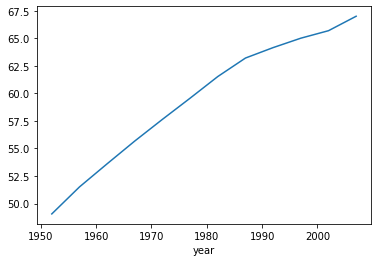

In [31]:
df.groupby('year')['lifeExp'].mean().plot()

In [32]:
pd.Series(['Kim','Park'])

0     Kim
1    Park
dtype: object

In [33]:
pd.Series(['Kim','Park'],index=['n1','n2'])

n1     Kim
n2    Park
dtype: object

In [34]:
scientists = pd.DataFrame(
    data={'Occupation': ['Chemist', 'Statistician'], 
          'Born': ['1920-07-25', '1876-06-13'], 
          'Died': ['1958-04-16', '1937-10-16'],
          'Age': [37, 61]},
    index=['Rosaline Franklin', 'William Gosset'],
    columns=['Occupation', 'Born', 'Died', 'Age'])

In [35]:
scientists

,Occupation,Born,Died,Age
Rosaline Franklin,Chemist,1920-07-25,1958-04-16,37
William Gosset,Statistician,1876-06-13,1937-10-16,61


In [43]:
scientists.keys()

scientists.values

scientists.index

scientists.keys()[0]

'Occupation'

In [46]:
sci=pd.read_csv('scientists.csv')
sci

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist
5,John Snow,1813-03-15,1858-06-16,45,Physician
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician


In [51]:
v=[True,True,True,True,True,True,False,True]
sci.loc[:,'Age']


#불린참조
sci['Age'][v]  #6번이 빠짐

0    37
1    61
2    90
3    66
4    56
5    45
7    77
Name: Age, dtype: int64

In [52]:
ages=sci['Age']

In [53]:
ages

0    37
1    61
2    90
3    66
4    56
5    45
6    41
7    77
Name: Age, dtype: int64

In [55]:
ages+ages  #벡터간 연산(요소간)

ages+10 #벡터와 스칼라간 연산(스칼라 값이 브로드캐스티드 됨=벡터 길이만큼)

0     47
1     71
2    100
3     76
4     66
5     55
6     51
7     87
Name: Age, dtype: int64

In [57]:
pd.Series([10,20])

0    10
1    20
dtype: int64

In [59]:
ages+pd.Series([10,20])  #NaN

0    47.0
1    81.0
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
dtype: float64

In [61]:
ages.sort_index()  #인덱스 기준 오름차순 정렬
ages.sort_index(ascending=False) #내림차순 정렬

7    77
6    41
5    45
4    56
3    66
2    90
1    61
0    37
Name: Age, dtype: int64

In [62]:
sci

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist
5,John Snow,1813-03-15,1858-06-16,45,Physician
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician


In [64]:
sci['Born']  #Name: Born, dtype: object=>문자데이터임

0    1920-07-25
1    1876-06-13
2    1820-05-12
3    1867-11-07
4    1907-05-27
5    1813-03-15
6    1912-06-23
7    1777-04-30
Name: Born, dtype: object

## 문자데이터를 날짜타입으로 바꾸는 함수

In [68]:
born=pd.to_datetime(sci['Born'],format='%Y-%m-%d')
born

0   1920-07-25
1   1876-06-13
2   1820-05-12
3   1867-11-07
4   1907-05-27
5   1813-03-15
6   1912-06-23
7   1777-04-30
Name: Born, dtype: datetime64[ns]

In [73]:
died=pd.to_datetime(sci['Died'],format='%Y-%m-%d')
died

0   1958-04-16
1   1937-10-16
2   1910-08-13
3   1934-07-04
4   1964-04-14
5   1858-06-16
6   1954-06-07
7   1855-02-23
Name: Died, dtype: datetime64[ns]

In [80]:
died-born  #생존일수

ageDays=died-born
ageDays

sci['ageDays']=ageDays

In [81]:
sci

,Name,Born,Died,Age,Occupation,ageDays
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,13779 days
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,22404 days
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse,32964 days
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist,24345 days
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist,20777 days
5,John Snow,1813-03-15,1858-06-16,45,Physician,16529 days
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist,15324 days
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician,28422 days


## 피클 저장(객체 저장)

In [85]:
myname=sci['Name']
myname

0       Rosaline Franklin
1          William Gosset
2    Florence Nightingale
3             Marie Curie
4           Rachel Carson
5               John Snow
6             Alan Turing
7            Johann Gauss
Name: Name, dtype: object

In [86]:
myname.to_pickle('nameSeries.pickle')

In [88]:
ms=pd.read_pickle('nameSeries.pickle')
ms

0       Rosaline Franklin
1          William Gosset
2    Florence Nightingale
3             Marie Curie
4           Rachel Carson
5               John Snow
6             Alan Turing
7            Johann Gauss
Name: Name, dtype: object

In [89]:
sci.to_csv('scicsv.csv')

In [91]:
sci.to_csv('scicsv.tsv',sep='\t')  #tsv로 저장

In [92]:
sci.to_csv('scicsv.csv',index=False)

In [94]:
#엑셀로 저장
import openpyxl 

In [95]:
sci.to_excel('sci2.xlsx')

## concat

In [96]:
df1 = pd.read_csv('concat_1.csv') 
df2 = pd.read_csv('concat_2.csv') 
df3 = pd.read_csv('concat_3.csv')

In [97]:
df1

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3


In [98]:
df2

,A,B,C,D
0,a4,b4,c4,d4
1,a5,b5,c5,d5
2,a6,b6,c6,d6
3,a7,b7,c7,d7


In [99]:
df3

,A,B,C,D
0,a8,b8,c8,d8
1,a9,b9,c9,d9
2,a10,b10,c10,d10
3,a11,b11,c11,d11


In [104]:
rc=pd.concat([df1,df2,df3])
rc.iloc[3,]
rc.loc[3,]

,A,B,C,D
3,a3,b3,c3,d3
3,a7,b7,c7,d7
3,a11,b11,c11,d11


In [105]:
nrs=pd.Series(['n1','n2','n3','n4'])
nrs

0    n1
1    n2
2    n3
3    n4
dtype: object

In [108]:
df1

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3


In [109]:
nrs

0    n1
1    n2
2    n3
3    n4
dtype: object

In [110]:
pd.concat([df1,nrs])  #시리즈의 경우 우측 열에 추가됨

,A,B,C,D,0
0,a0,b0,c0,d0,NaN
1,a1,b1,c1,d1,NaN
2,a2,b2,c2,d2,NaN
3,a3,b3,c3,d3,NaN
0,NaN,NaN,NaN,NaN,n1
1,NaN,NaN,NaN,NaN,n2
2,NaN,NaN,NaN,NaN,n3
3,NaN,NaN,NaN,NaN,n4


In [111]:
nrd = pd.DataFrame([['n1', 'n2', 'n3', 'n4']], columns=['A', 'B', 'C', 'D'])

In [112]:
nrd

,A,B,C,D
0,n1,n2,n3,n4


In [113]:
df1

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3


In [114]:
pd.concat([df1,nrd])  #데이터프레임은 아래쪽에 추가됨

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
0,n1,n2,n3,n4


## append함수

In [115]:
df1.append(nrd)  #concat과 동일한 결과

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
0,n1,n2,n3,n4


## 데이터 프레임에 dictionary(딕셔너리) 추가하기

In [116]:
data_dict = {'A': 'n1', 'B': 'n2', 'C': 'n3', 'D': 'n4'}

In [118]:
df1.append(data_dict, ignore_index=True)

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
4,n1,n2,n3,n4


In [125]:
rci=pd.concat([df1,df2,df3],ignore_index=True,axis=0)
rci

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
4,a4,b4,c4,d4
5,a5,b5,c5,d5
6,a6,b6,c6,d6
7,a7,b7,c7,d7
8,a8,b8,c8,d8
9,a9,b9,c9,d9


In [130]:
cc=pd.concat([df1,df2,df3],axis=1)
cc

,A,B,C,D,A,B,C,D,A,B,C,D
0,a0,b0,c0,d0,a4,b4,c4,d4,a8,b8,c8,d8
1,a1,b1,c1,d1,a5,b5,c5,d5,a9,b9,c9,d9
2,a2,b2,c2,d2,a6,b6,c6,d6,a10,b10,c10,d10
3,a3,b3,c3,d3,a7,b7,c7,d7,a11,b11,c11,d11


In [129]:
cc['A']

,A,A,A
0,a0,a4,a8
1,a1,a5,a9
2,a2,a6,a10
3,a3,a7,a11


In [132]:
pd.concat([df1,df2,df3],axis=1,ignore_index=True)
#axis=1으로 줬을때 ignore_index=True는 열로 적용됨(원래 ignore_index=True는 행방향으로 적용)

,0,1,2,3,4,5,6,7,8,9,10,11
0,a0,b0,c0,d0,a4,b4,c4,d4,a8,b8,c8,d8
1,a1,b1,c1,d1,a5,b5,c5,d5,a9,b9,c9,d9
2,a2,b2,c2,d2,a6,b6,c6,d6,a10,b10,c10,d10
3,a3,b3,c3,d3,a7,b7,c7,d7,a11,b11,c11,d11


In [133]:
df1.columns = ['A', 'B', 'C', 'D'] 
df2.columns = ['E', 'F', 'G', 'H'] 
df3.columns = ['A', 'C', 'F', 'H']


In [134]:
df1

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3


In [135]:
df2

,E,F,G,H
0,a4,b4,c4,d4
1,a5,b5,c5,d5
2,a6,b6,c6,d6
3,a7,b7,c7,d7


In [136]:
df3

,A,C,F,H
0,a8,b8,c8,d8
1,a9,b9,c9,d9
2,a10,b10,c10,d10
3,a11,b11,c11,d11


In [137]:
 pd.concat([df1,df2,df3])

,A,B,C,D,E,F,G,H
0,a0,b0,c0,d0,NaN,NaN,NaN,NaN
1,a1,b1,c1,d1,NaN,NaN,NaN,NaN
2,a2,b2,c2,d2,NaN,NaN,NaN,NaN
3,a3,b3,c3,d3,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,a4,b4,c4,d4
1,NaN,NaN,NaN,NaN,a5,b5,c5,d5
2,NaN,NaN,NaN,NaN,a6,b6,c6,d6
3,NaN,NaN,NaN,NaN,a7,b7,c7,d7
0,a8,NaN,b8,NaN,NaN,c8,NaN,d8
1,a9,NaN,b9,NaN,NaN,c9,NaN,d9


In [138]:
pd.concat([df1,df2,df3],join='outer')

,A,B,C,D,E,F,G,H
0,a0,b0,c0,d0,NaN,NaN,NaN,NaN
1,a1,b1,c1,d1,NaN,NaN,NaN,NaN
2,a2,b2,c2,d2,NaN,NaN,NaN,NaN
3,a3,b3,c3,d3,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,a4,b4,c4,d4
1,NaN,NaN,NaN,NaN,a5,b5,c5,d5
2,NaN,NaN,NaN,NaN,a6,b6,c6,d6
3,NaN,NaN,NaN,NaN,a7,b7,c7,d7
0,a8,NaN,b8,NaN,NaN,c8,NaN,d8
1,a9,NaN,b9,NaN,NaN,c9,NaN,d9


In [141]:
pd.concat([df1,df2,df3],join='inner') #공통적으로 가지고 있는 데이터가 없음

""
0
1
2
3
0
1
2
3
0
1


In [143]:
pd.concat([df1,df3],join='outer')

,A,B,C,D,F,H
0,a0,b0,c0,d0,NaN,NaN
1,a1,b1,c1,d1,NaN,NaN
2,a2,b2,c2,d2,NaN,NaN
3,a3,b3,c3,d3,NaN,NaN
0,a8,NaN,b8,NaN,c8,d8
1,a9,NaN,b9,NaN,c9,d9
2,a10,NaN,b10,NaN,c10,d10
3,a11,NaN,b11,NaN,c11,d11


In [145]:
pd.concat([df1,df3],join='inner',ignore_index=True)

,A,C
0,a0,c0
1,a1,c1
2,a2,c2
3,a3,c3
4,a8,b8
5,a9,b9
6,a10,b10
7,a11,b11


In [146]:
pd.concat([df1,df3],join='inner')

,A,C
0,a0,c0
1,a1,c1
2,a2,c2
3,a3,c3
0,a8,b8
1,a9,b9
2,a10,b10
3,a11,b11


In [147]:
df1.index = [0, 1, 2, 3] 
df2.index = [4, 5, 6, 7] 
df3.index = [0, 2, 5, 7]

In [148]:
df1

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3


In [149]:
df2

,E,F,G,H
4,a4,b4,c4,d4
5,a5,b5,c5,d5
6,a6,b6,c6,d6
7,a7,b7,c7,d7


In [150]:
df3

,A,C,F,H
0,a8,b8,c8,d8
2,a9,b9,c9,d9
5,a10,b10,c10,d10
7,a11,b11,c11,d11


In [151]:
pd.concat([df1,df2,df3])  #axis=0

,A,B,C,D,E,F,G,H
0,a0,b0,c0,d0,NaN,NaN,NaN,NaN
1,a1,b1,c1,d1,NaN,NaN,NaN,NaN
2,a2,b2,c2,d2,NaN,NaN,NaN,NaN
3,a3,b3,c3,d3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,a4,b4,c4,d4
5,NaN,NaN,NaN,NaN,a5,b5,c5,d5
6,NaN,NaN,NaN,NaN,a6,b6,c6,d6
7,NaN,NaN,NaN,NaN,a7,b7,c7,d7
0,a8,NaN,b8,NaN,NaN,c8,NaN,d8
2,a9,NaN,b9,NaN,NaN,c9,NaN,d9


In [153]:
pd.concat([df1,df2,df3],axis=1)

,A,B,C,D,E,F,G,H,A,C,F,H
0,a0,b0,c0,d0,NaN,NaN,NaN,NaN,a8,b8,c8,d8
1,a1,b1,c1,d1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a2,b2,c2,d2,NaN,NaN,NaN,NaN,a9,b9,c9,d9
3,a3,b3,c3,d3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,a4,b4,c4,d4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,a5,b5,c5,d5,a10,b10,c10,d10
6,NaN,NaN,NaN,NaN,a6,b6,c6,d6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,a7,b7,c7,d7,a11,b11,c11,d11


In [155]:
pd.concat([df1,df3],axis=1,join='inner')

,A,B,C,D,A,C,F,H
0,a0,b0,c0,d0,a8,b8,c8,d8
2,a2,b2,c2,d2,a9,b9,c9,d9


In [156]:
person = pd.read_csv('survey_person.csv') 
site = pd.read_csv('survey_site.csv') 
survey = pd.read_csv('survey_survey.csv') 
visited = pd.read_csv('survey_visited.csv')

In [157]:
person

,ident,personal,family
0,dyer,William,Dyer
1,pb,Frank,Pabodie
2,lake,Anderson,Lake
3,roe,Valentina,Roerich
4,danforth,Frank,Danforth


In [158]:
site

,name,lat,long
0,DR-1,-49.85,-128.57
1,DR-3,-47.15,-126.72
2,MSK-4,-48.87,-123.40


In [160]:
survey

,taken,person,quant,reading
0,619,dyer,rad,9.82
1,619,dyer,sal,0.13
2,622,dyer,rad,7.80
3,622,dyer,sal,0.09
4,734,pb,rad,8.41
5,734,lake,sal,0.05
6,734,pb,temp,-21.50
7,735,pb,rad,7.22
8,735,NaN,sal,0.06
9,735,NaN,temp,-26.00


In [161]:
visited

,ident,site,dated
0,619,DR-1,1927-02-08
1,622,DR-1,1927-02-10
2,734,DR-3,1939-01-07
3,735,DR-3,1930-01-12
4,751,DR-3,1930-02-26
5,752,DR-3,NaN
6,837,MSK-4,1932-01-14
7,844,DR-1,1932-03-22


In [164]:
vs=visited.loc[[0,2,6],]

In [167]:
sv=site.merge(vs, left_on='name',right_on='site')
sv

,name,lat,long,ident,site,dated
0,DR-1,-49.85,-128.57,619,DR-1,1927-02-08
1,DR-3,-47.15,-126.72,734,DR-3,1939-01-07
2,MSK-4,-48.87,-123.40,837,MSK-4,1932-01-14


In [168]:
site

,name,lat,long
0,DR-1,-49.85,-128.57
1,DR-3,-47.15,-126.72
2,MSK-4,-48.87,-123.40


In [169]:
visited

,ident,site,dated
0,619,DR-1,1927-02-08
1,622,DR-1,1927-02-10
2,734,DR-3,1939-01-07
3,735,DR-3,1930-01-12
4,751,DR-3,1930-02-26
5,752,DR-3,NaN
6,837,MSK-4,1932-01-14
7,844,DR-1,1932-03-22


In [170]:
sv=site.merge(visited, left_on='name',right_on='site')
sv

,name,lat,long,ident,site,dated
0,DR-1,-49.85,-128.57,619,DR-1,1927-02-08
1,DR-1,-49.85,-128.57,622,DR-1,1927-02-10
2,DR-1,-49.85,-128.57,844,DR-1,1932-03-22
3,DR-3,-47.15,-126.72,734,DR-3,1939-01-07
4,DR-3,-47.15,-126.72,735,DR-3,1930-01-12
5,DR-3,-47.15,-126.72,751,DR-3,1930-02-26
6,DR-3,-47.15,-126.72,752,DR-3,NaN
7,MSK-4,-48.87,-123.40,837,MSK-4,1932-01-14


In [171]:
survey

,taken,person,quant,reading
0,619,dyer,rad,9.82
1,619,dyer,sal,0.13
2,622,dyer,rad,7.80
3,622,dyer,sal,0.09
4,734,pb,rad,8.41
5,734,lake,sal,0.05
6,734,pb,temp,-21.50
7,735,pb,rad,7.22
8,735,NaN,sal,0.06
9,735,NaN,temp,-26.00


In [172]:
person


,ident,personal,family
0,dyer,William,Dyer
1,pb,Frank,Pabodie
2,lake,Anderson,Lake
3,roe,Valentina,Roerich
4,danforth,Frank,Danforth


In [173]:
person.merge(survey, left_on='ident',right_on='person')

,ident,personal,family,taken,person,quant,reading
0,dyer,William,Dyer,619,dyer,rad,9.82
1,dyer,William,Dyer,619,dyer,sal,0.13
2,dyer,William,Dyer,622,dyer,rad,7.80
3,dyer,William,Dyer,622,dyer,sal,0.09
4,pb,Frank,Pabodie,734,pb,rad,8.41
5,pb,Frank,Pabodie,734,pb,temp,-21.50
6,pb,Frank,Pabodie,735,pb,rad,7.22
7,pb,Frank,Pabodie,751,pb,rad,4.35
8,pb,Frank,Pabodie,751,pb,temp,-18.50
9,lake,Anderson,Lake,734,lake,sal,0.05


In [176]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [180]:
import seaborn as sns 
anscombe = sns.load_dataset("anscombe")
anscombe

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [181]:
ds1=anscombe[anscombe['dataset']=='I']
ds1

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


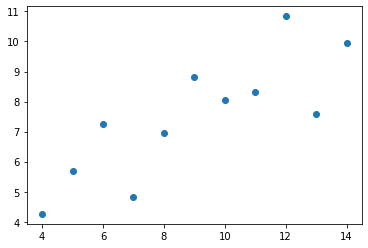

In [183]:
plt.plot(ds1['x'],ds1['y'],'o')

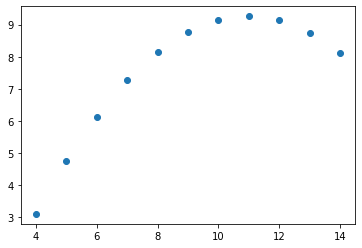

In [185]:
ds2=anscombe[anscombe['dataset']=='II']
plt.plot(ds2['x'],ds2['y'],'o')

In [187]:
ds3=anscombe[anscombe['dataset']=='III']
ds4=anscombe[anscombe['dataset']=='IV']


## 시각화 창 나누는 방법

In [188]:
fig=plt.figure()  #도화지 준비

<Figure size 432x288 with 0 Axes>

In [190]:
axis1=fig.add_subplot(2,2,1)   #2줄 2칸 좌측상단
axis2=fig.add_subplot(2,2,2)   #2줄 2칸 우측상단
axis3=fig.add_subplot(2,2,3)   #2줄 2칸 좌측하단
axis4=fig.add_subplot(2,2,4)   #2줄 2칸 우측하단

#axis:축, axes=전체 축

<ipython-input-190-b2770cae036d>:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axis1=fig.add_subplot(2,2,1)   #2줄 2칸 좌측상단


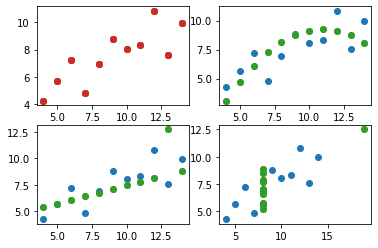

In [197]:
axis1.plot(ds1['x'],ds1['y'],'o')
axis2.plot(ds2['x'],ds2['y'],'o')
axis3.plot(ds3['x'],ds3['y'],'o')
axis4.plot(ds4['x'],ds4['y'],'o')

fig

In [214]:
tips=sns.load_dataset('tips')

In [215]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [216]:
#plotly,folium : interactive 시각화 도구

In [217]:
fig=plt.figure()

<Figure size 432x288 with 0 Axes>

In [218]:
axes1=fig.add_subplot(1,1,1) #fig 도화지 1장을 나누지 않고 전체 화면에 그래프 출력


In [207]:
axes1=fig.add_subplot(2,2,1)

<ipython-input-207-48e9d22fdb8b>:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes1=fig.add_subplot(2,2,1)


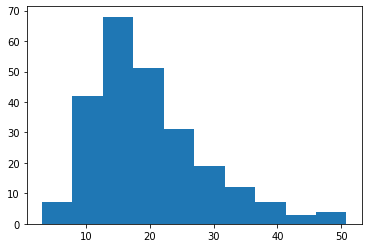

In [219]:
axes1.hist(tips['total_bill'], bins=10)  #bins= 10개 구간으로 나누기
fig

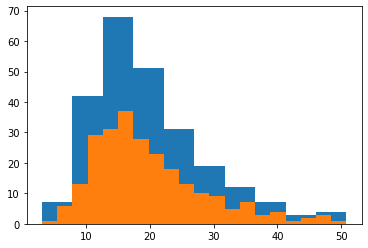

In [220]:
axes1.hist(tips['total_bill'], bins=20)  #bins= 20개 구간으로 나누기
fig

In [221]:
sp=plt.figure()
sp

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<ipython-input-224-556f2814ba10>:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes1=sp.add_subplot(1,1,1)


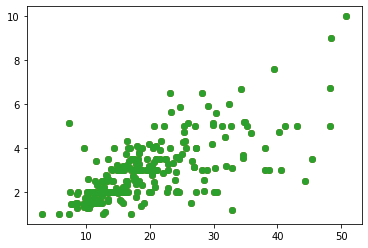

In [224]:
axes1=sp.add_subplot(1,1,1)
axes1.scatter(tips['total_bill'],tips['tip'])
sp

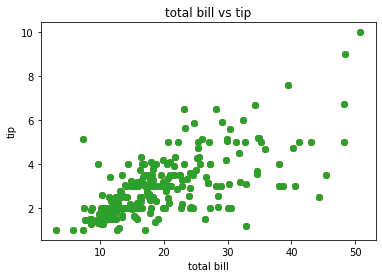

In [226]:
axes1=sp.add_subplot(1,1,1)
axes1.scatter(tips['total_bill'],tips['tip'])
axes1.set_title('total bill vs tip')
axes1.set_xlabel('total bill')
axes1.set_ylabel('tip')
sp


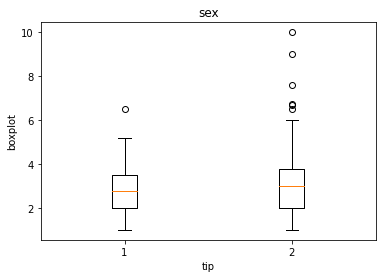

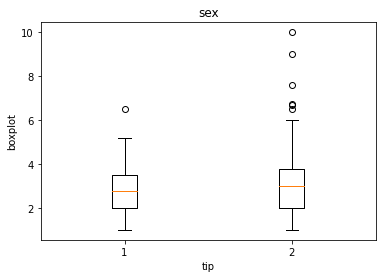

In [230]:
boxp=plt.figure()
axes1=boxp.add_subplot(1,1,1)
axes1.boxplot([tips[tips['sex']=='Female']['tip'],
             tips[tips['sex']=='Male']['tip']])  #산점도 그래프
axes1.set_title('sex')
axes1.set_xlabel('tip')
axes1.set_ylabel('boxplot')
boxp

In [229]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [233]:
def cs(a):
    if a=='Female':
        return 0
    else:
        return 1


In [236]:
#cs함수에 sex열 전달
tips['sex'].apply(cs)

0      0
1      1
2      1
3      1
4      0
      ..
239    1
240    0
241    1
242    1
243    0
Name: sex, Length: 244, dtype: category
Categories (2, int64): [1, 0]

In [237]:
tips['sc']=tips['sex'].apply(cs)

In [238]:
tips['sc']

0      0
1      1
2      1
3      1
4      0
      ..
239    1
240    0
241    1
242    1
243    0
Name: sc, Length: 244, dtype: category
Categories (2, int64): [1, 0]

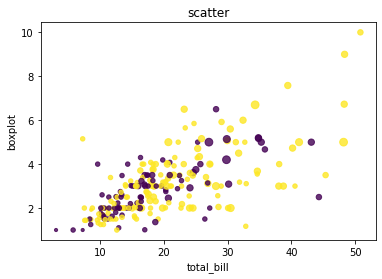

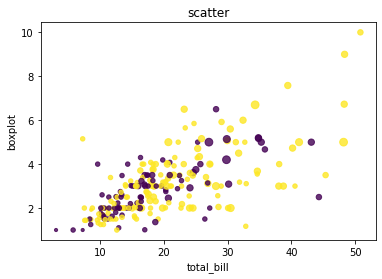

In [245]:
sp=plt.figure()
axes1=sp.add_subplot(1,1,1)
axes1.scatter(
    x=tips['total_bill'],
    y=tips['tip'],
    s=tips['size']*10,  #s=점의 크기 나타내는 속성
    c=tips['sc'],  #성별에 따라서도 ..
    alpha=0.8
)
axes1.set_title('scatter')
axes1.set_xlabel('total_bill')
axes1.set_ylabel('boxplot')
sp